In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Temperature Data

In [2]:
temp_df = pd.read_csv('raw-data/Heatvars_County_2000-2020_v1.2.csv')

Input Data: 
* [Source: Spangler, Liang, Wellenius via figshare.com](https://figshare.com/articles/dataset/Daily_County-Level_Wet-Bulb_Globe_Temperature_Universal_Thermal_Climate_Index_and_Other_Heat_Metrics_for_the_Contiguous_United_States_2000-2020/19419836)
* [Data Dictionary: Nature.com](https://www.nature.com/articles/s41597-022-01405-3/tables/4)
* citation: Spangler, Keith (2022). Daily, County-Level Wet-Bulb Globe Temperature, Universal Thermal Climate Index, and Other Heat Metrics for the Contiguous United States, 2000-2020. figshare. Dataset. https://doi.org/10.6084/m9.figshare.19419836.v2

Preprocessing Note: Data was downloaded from the above source in a .rds format.  The code below was used in RStudio to convert the file to a .csv for use outside R
```
rds_file <- "~/Downloads/Heatvars_County_2000-2020_v1.2.Rds"
data <- readRDS(rds_file)
csv_file <- "~/DSI-508/Projects/group-project/Heatvars_County_2000-2020_v1.2.csv"
write.csv(data, file = csv_file, row.names = FALSE)
```

---
***Original Data Dictionary***
|Feature| Variable Name (Long) | Description / Format                                     | Units |
|----------------------|---------------------|---------------------------------------------------------|-------|
| StCoFIPS             | State-county Federal Information Processing Standard (FIPS) Identifier | Unique county identifier: concatenation of two-digit state identifier and three-digit county identifier | N/A   |
| Date                 | Date                | Local day in the format YYYYMMDD                         | N/A   |
| Tmin_C               | Daily Minimum Ambient Temperature | Lowest 2-meter ambient temperature observed from hourly data from 00 LST to 23 LST | °C    |
| Tmax_C               | Daily Maximum Ambient Temperature | Highest 2-meter ambient temperature observed from hourly data from 00 LST to 23 LST | °C    |
| Tmean_C              | Daily Mean Ambient Temperature | 2-meter ambient temperature averaged over hourly observations from 00 LST to 23 LST | °C    |
| TDmin_C              | Daily Minimum Dew Point Temperature | Lowest dew point temperature observed from hourly data from 00 LST to 23 LST | °C    |
| TDmax_C              | Daily Maximum Dew Point Temperature | Highest dew point temperature observed from hourly data from 00 LST to 23 LST | °C    |
| TDmean_C             | Daily Mean Dew Point Temperature | Dew point temperature averaged over hourly observations from 00 LST to 23 LST | °C    |
| NETmin_C             | Daily Minimum Net Effective Temperature | Lowest net effective temperature observed from hourly data from 00 LST to 23 LST | °C    |
| NETmax_C             | Daily Maximum Net Effective Temperature | Highest net effective temperature observed from hourly data from 00 LST to 23 LST | °C    |
| NETmean_C            | Daily Mean Net Effective Temperature | Net effective temperature averaged over hourly observations from 00 LST to 23 LST | °C    |
| HImin_C              | Daily Minimum Heat Index | Lowest heat index observed from hourly data from 00 LST to 23 LST | °C    |
| HImax_C              | Daily Maximum Heat Index | Highest heat index observed from hourly data from 00 LST to 23 LST | °C    |
| HImean_C             | Daily Mean Heat Index | Heat index averaged over hourly observations from 00 LST to 23 LST | °C    |
| HXmin_C              | Daily Minimum Humidex | Lowest humidex observed from hourly data from 00 LST to 23 LST | °C    |
| HXmax_C              | Daily Maximum Humidex | Highest humidex observed from hourly data from 00 LST to 23 LST | °C    |
| HXmean_C             | Daily Mean Humidex | Humidex averaged over hourly observations from 00 LST to 23 LST | °C    |
| WBGTmin_C            | Daily Minimum Wet-Bulb Globe Temperature | Lowest wet-bulb globe temperature (WBGT) observed from hourly data from 00 LST to 23 LST | °C    |
| WBGTmax_C            | Daily Maximum Wet-Bulb Globe Temperature | Highest wet-bulb globe temperature (WBGT) observed from hourly data from 00 LST to 23 LST | °C    |
| WBGTmean_C           | Daily Mean Wet-Bulb Globe Temperature | Wet-bulb globe temperature (WBGT) averaged over hourly observations from 00 LST to 23 LST | °C    |
| UTCImin_C            | Daily Minimum Universal Thermal Climate Index | Lowest Universal Thermal Climate Index (UTCI) observed from hourly data from 00 LST to 23 LST | °C    |
| UTCImax_C            | Daily Maximum Universal Thermal Climate Index | Highest Universal Thermal Climate Index (UTCI) observed from hourly data from 00 LST to 23 LST | °C    |
| UTCImean_C           | Daily Mean Universal Thermal Climate Index | Universal Thermal Climate Index (UTCI) averaged over hourly data from 00 LST to 23 LST | °C    |
| Flag_T               | Ambient temperature flag | Indicator of the percent of county population represented by the county-day ambient temperature estimate. 0: ≥50%, 1: 10–49%, 2: <10%, 3: 0% (NA) | N/A   |
| Flag_TD              | Dew point temperature flag | Indicator of the percent of county population represented by the county-day dew point temperature estimate. 0: ≥50%, 1: 10–49%, 2: <10%, 3: 0% (NA) | N/A   |
| Flag_NET             | Net effective temperature flag | Indicator of the percent of county population represented by the county-day net effective temperature estimate. 0: ≥50%, 1: 10–49%, 2: <10%, 3: 0% (NA) | N/A   |
| Flag_HI              | Heat index flag | Indicator of the percent of county population represented by the county-day heat index estimate. 0: ≥50%, 1: 10–49%, 2: <10%, 3: 0% (NA) | N/A   |
| Flag_HX              | Humidex flag | Indicator of the percent of county population represented by the county-day humidex estimate. 0: ≥50%, 1: 10–49%, 2: <10%, 3: 0% (NA) | N/A   |
| Flag_WBGT            | Wet-bulb globe temperature flag | Indicator of the percent of county population represented by the county-day WBGT estimate. 0: ≥50%, 1: 10–49%, 2: <10%, 3: 0% (NA) | N/A   |
| Flag_UTCI            | Universal Thermal Climate Index flag | Indicator of the percent of county population represented by the county-day UTCI estimate. 0: ≥50%, 1: 10–49%, 2: <10%, 3: 0% (NA) | N/A   |

---
*** Model Usage Data Dictionary***
|Feature| Variable Name (Long) | Description / Format                                     | Units |
|----------------------|---------------------|---------------------------------------------------------|-------|
| StCoFIPS             | State-county Federal Information Processing Standard (FIPS) Identifier | Unique county identifier: concatenation of two-digit state identifier and three-digit county identifier | N/A   |
| Date                 | Date                | Local day in the format YYYYMMDD                         | N/A   |
| Tmin_C               | Daily Minimum Ambient Temperature | Lowest 2-meter ambient temperature observed from hourly data from 00 LST to 23 LST | °C    |
| Tmax_C               | Daily Maximum Ambient Temperature | Highest 2-meter ambient temperature observed from hourly data from 00 LST to 23 LST | °C    |
| Tmean_C              | Daily Mean Ambient Temperature | 2-meter ambient temperature averaged over hourly observations from 00 LST to 23 LST | °C    |
| TDmin_C              | Daily Minimum Dew Point Temperature | Lowest dew point temperature observed from hourly data from 00 LST to 23 LST | °C    |
| TDmax_C              | Daily Maximum Dew Point Temperature | Highest dew point temperature observed from hourly data from 00 LST to 23 LST | °C    |
| TDmean_C             | Daily Mean Dew Point Temperature | Dew point temperature averaged over hourly observations from 00 LST to 23 LST | °C    |
| NETmin_C             | Daily Minimum Net Effective Temperature | Lowest net effective temperature observed from hourly data from 00 LST to 23 LST | °C    |
| NETmax_C             | Daily Maximum Net Effective Temperature | Highest net effective temperature observed from hourly data from 00 LST to 23 LST | °C    |
| NETmean_C            | Daily Mean Net Effective Temperature | Net effective temperature averaged over hourly observations from 00 LST to 23 LST | °C    |
| HImin_C              | Daily Minimum Heat Index | Lowest heat index observed from hourly data from 00 LST to 23 LST | °C    |
| HImax_C              | Daily Maximum Heat Index | Highest heat index observed from hourly data from 00 LST to 23 LST | °C    |
| HImean_C             | Daily Mean Heat Index | Heat index averaged over hourly observations from 00 LST to 23 LST | °C    |
| HXmin_C              | Daily Minimum Humidex | Lowest humidex observed from hourly data from 00 LST to 23 LST | °C    |
| HXmax_C              | Daily Maximum Humidex | Highest humidex observed from hourly data from 00 LST to 23 LST | °C    |
| HXmean_C             | Daily Mean Humidex | Humidex averaged over hourly observations from 00 LST to 23 LST | °C    |
| WBGTmin_C            | Daily Minimum Wet-Bulb Globe Temperature | Lowest wet-bulb globe temperature (WBGT) observed from hourly data from 00 LST to 23 LST | °C    |
| WBGTmax_C            | Daily Maximum Wet-Bulb Globe Temperature | Highest wet-bulb globe temperature (WBGT) observed from hourly data from 00 LST to 23 LST | °C    |
| WBGTmean_C           | Daily Mean Wet-Bulb Globe Temperature | Wet-bulb globe temperature (WBGT) averaged over hourly observations from 00 LST to 23 LST | °C    |
| UTCImin_C            | Daily Minimum Universal Thermal Climate Index | Lowest Universal Thermal Climate Index (UTCI) observed from hourly data from 00 LST to 23 LST | °C    |
| UTCImax_C            | Daily Maximum Universal Thermal Climate Index | Highest Universal Thermal Climate Index (UTCI) observed from hourly data from 00 LST to 23 LST | °C    |
| UTCImean_C           | Daily Mean Universal Thermal Climate Index | Universal Thermal Climate Index (UTCI) averaged over hourly data from 00 LST to 23 LST | °C    |
| Flag_T               | Ambient temperature flag | Indicator of the percent of county population represented by the county-day ambient temperature estimate. 0: ≥50%, 1: 10–49%, 2: <10%, 3: 0% (NA) | N/A   |
| Flag_TD              | Dew point temperature flag | Indicator of the percent of county population represented by the county-day dew point temperature estimate. 0: ≥50%, 1: 10–49%, 2: <10%, 3: 0% (NA) | N/A   |
| Flag_NET             | Net effective temperature flag | Indicator of the percent of county population represented by the county-day net effective temperature estimate. 0: ≥50%, 1: 10–49%, 2: <10%, 3: 0% (NA) | N/A   |
| Flag_HI              | Heat index flag | Indicator of the percent of county population represented by the county-day heat index estimate. 0: ≥50%, 1: 10–49%, 2: <10%, 3: 0% (NA) | N/A   |
| Flag_HX              | Humidex flag | Indicator of the percent of county population represented by the county-day humidex estimate. 0: ≥50%, 1: 10–49%, 2: <10%, 3: 0% (NA) | N/A   |
| Flag_WBGT            | Wet-bulb globe temperature flag | Indicator of the percent of county population represented by the county-day WBGT estimate. 0: ≥50%, 1: 10–49%, 2: <10%, 3: 0% (NA) | N/A   |
| Flag_UTCI            | Universal Thermal Climate Index flag | Indicator of the percent of county population represented by the county-day UTCI estimate. 0: ≥50%, 1: 10–49%, 2: <10%, 3: 0% (NA) | N/A   |




In [3]:
temp_df.shape

(23835252, 30)

In [4]:
print(f"The Original DataFrame is {round(temp_df.size / 1_000_000,2)} million cells")

The Original DataFrame is 715.06 million cells


In [5]:
temp_df.head()

,StCoFIPS,Date,Tmin_C,Tmax_C,Tmean_C,TDmin_C,TDmax_C,TDmean_C,NETmin_C,NETmax_C,...,UTCImin_C,UTCImax_C,UTCImean_C,Flag_T,Flag_TD,Flag_NET,Flag_HI,Flag_HX,Flag_WBGT,Flag_UTCI
0,1001,2000-01-02,14.73,21.53,17.27,14.52,16.30,15.38,8.19,15.48,...,12.18,24.50,16.38,0,0,0,0,0,0,0
1,1003,2000-01-02,16.67,21.72,18.74,16.14,18.41,17.43,9.75,14.75,...,11.95,24.35,16.66,0,0,0,0,0,0,0
2,1005,2000-01-02,13.88,20.08,16.21,13.80,16.25,14.92,7.23,15.01,...,11.45,22.80,15.67,0,0,0,0,0,0,0
3,1007,2000-01-02,13.55,20.95,16.58,13.44,16.69,15.02,6.46,15.00,...,9.62,24.41,15.45,0,0,0,0,0,0,0
4,1009,2000-01-02,13.58,18.49,15.32,13.46,15.80,14.56,5.96,12.11,...,9.98,21.16,13.61,0,0,0,0,0,0,0


In [6]:
# Downsize Columns by dropping mins and maxes
# Data is collected here at a daily level.  All other sources are annual.  Will normalize at the day level.
list(temp_df.columns)
temp = temp_df.copy()
temp.drop(columns = [
 # 'StCoFIPS',
 # 'Date',
 'Tmin_C',
 'Tmax_C',
 # 'Tmean_C',
 'TDmin_C',
 'TDmax_C',
 # 'TDmean_C',
 'NETmin_C',
 'NETmax_C',
 # 'NETmean_C',
 'HImin_C',
 'HImax_C',
 # 'HImean_C',
 'HXmin_C',
 'HXmax_C',
 #'HXmean_C',
 'WBGTmin_C',
 'WBGTmax_C',
 #'WBGTmean_C',
 'UTCImin_C',
 'UTCImax_C',
 'UTCImean_C',
 #'Flag_T',
 #'Flag_TD',
 #'Flag_NET',
 #'Flag_HI',
 #'Flag_HX',
 #'Flag_WBGT',
 'Flag_UTCI'
], inplace = True)

In [7]:
temp.Date = pd.to_datetime(temp.Date, format = '%Y-%M-%d')

In [8]:
temp.head()

,StCoFIPS,Date,Tmean_C,TDmean_C,NETmean_C,HImean_C,HXmean_C,WBGTmean_C,Flag_T,Flag_TD,Flag_NET,Flag_HI,Flag_HX,Flag_WBGT
0,1001,2000-01-02 00:01:00,17.27,15.38,10.78,17.39,21.41,16.71,0,0,0,0,0,0
1,1003,2000-01-02 00:01:00,18.74,17.43,11.65,19.09,24.24,18.75,0,0,0,0,0,0
2,1005,2000-01-02 00:01:00,16.21,14.92,10.19,16.31,20.08,15.85,0,0,0,0,0,0
3,1007,2000-01-02 00:01:00,16.58,15.02,10.03,16.67,20.51,16.11,0,0,0,0,0,0
4,1009,2000-01-02 00:01:00,15.32,14.56,8.23,15.40,18.96,15.12,0,0,0,0,0,0


### Create an Annual Average Dataset

In [9]:
annual_temp = round(temp.groupby([temp.Date.dt.year,temp.StCoFIPS]).mean(numeric_only=False),2)

In [10]:
annual_temp.head()

Date  Tmean_C  TDmean_C  NETmean_C  \
Date StCoFIPS                                                               
2000 1001     2000-01-15 19:14:35.013698560    18.45     11.49      12.37   
     1003     2000-01-15 19:14:35.013698560    20.07     14.69      13.78   
     1005     2000-01-15 19:14:35.013698560    18.63     12.14      12.92   
     1007     2000-01-15 19:14:35.013698560    18.01     11.13      12.26   
     1009     2000-01-15 19:14:35.013698560    16.65     10.19      10.74   

               HImean_C  HXmean_C  WBGTmean_C  Flag_T  Flag_TD  Flag_NET  \
Date StCoFIPS                                                              
2000 1001         18.48     21.36       16.73     0.0      0.0       0.0   
     1003         20.70     24.86       18.90     0.0      0.0       0.0   
     1005         18.72     21.87       17.17     0.0      0.0       0.0   
     1007         18.04     20.81       16.42     0.0      0.0       0.0   
     1009         16.57     19.02       15.25     0.0      0.0       0.0   

               Flag_HI  Flag_HX  Flag_WBGT  
Date StCoFIPS                               
2000 1001          0.0      0.0        0.0  
     1003          0.0      0.0        0.0  
     1005          0.0      0.0        0.0  
     1007          0.0      0.0        0.0  
     1009          0.0      0.0        0.0

In [11]:
annual_temp['Date'] = pd.to_datetime(annual_temp['Date'].dt.strftime('%Y-%m'))

In [12]:
annual_temp['Date'].value_counts()

2000-01-01    3108
2011-01-01    3108
2019-01-01    3108
2018-01-01    3108
2017-01-01    3108
2016-01-01    3108
2015-01-01    3108
2014-01-01    3108
2013-01-01    3108
2012-01-01    3108
2010-01-01    3108
2001-01-01    3108
2009-01-01    3108
2008-01-01    3108
2007-01-01    3108
2006-01-01    3108
2005-01-01    3108
2004-01-01    3108
2003-01-01    3108
2002-01-01    3108
2020-01-01    3108
Name: Date, dtype: int64

In [13]:
temp.loc[(temp['StCoFIPS']==1001) & (temp['Date'].dt.year == 2000), 'Tmean_C'].mean() #confirmation

18.451506849315066

In [14]:
annual_temp.drop(columns = 'Date', inplace=True)

In [15]:
annual_temp.reset_index(inplace=True)

In [16]:
annual_temp.rename(columns = {'Date': 'Year'}, inplace = True)

In [17]:
annual_temp.shape

(65268, 14)

In [18]:
annual_temp.head()

,Year,StCoFIPS,Tmean_C,TDmean_C,NETmean_C,HImean_C,HXmean_C,WBGTmean_C,Flag_T,Flag_TD,Flag_NET,Flag_HI,Flag_HX,Flag_WBGT
0,2000,1001,18.45,11.49,12.37,18.48,21.36,16.73,0.0,0.0,0.0,0.0,0.0,0.0
1,2000,1003,20.07,14.69,13.78,20.70,24.86,18.90,0.0,0.0,0.0,0.0,0.0,0.0
2,2000,1005,18.63,12.14,12.92,18.72,21.87,17.17,0.0,0.0,0.0,0.0,0.0,0.0
3,2000,1007,18.01,11.13,12.26,18.04,20.81,16.42,0.0,0.0,0.0,0.0,0.0,0.0
4,2000,1009,16.65,10.19,10.74,16.57,19.02,15.25,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
annual_temp.to_csv('raw-data/annual_temperature_2000-2020_FIPS.csv', index = False)

### Create Monthly Temperature Dataset

In [60]:
# Interested in simple min-mean-max for temperature
mon_temp = temp_df.copy()
mon_temp.drop(columns = [
 # 'StCoFIPS',
 # 'Date',
 #'Tmin_C',
 #'Tmax_C',
 # 'Tmean_C',
 'TDmin_C',
 'TDmax_C',
 'TDmean_C',
 'NETmin_C',
 'NETmax_C',
 'NETmean_C',
 'HImin_C',
 'HImax_C',
 'HImean_C',
 'HXmin_C',
 'HXmax_C',
 'HXmean_C',
 'WBGTmin_C',
 'WBGTmax_C',
 'WBGTmean_C',
 'UTCImin_C',
 'UTCImax_C',
 'UTCImean_C',
 #'Flag_T',
 'Flag_TD',
 'Flag_NET',
 'Flag_HI',
 'Flag_HX',
 'Flag_WBGT',
 'Flag_UTCI'
], inplace = True)

In [61]:
mon_temp.head()

,StCoFIPS,Date,Tmin_C,Tmax_C,Tmean_C,Flag_T
0,1001,2000-01-02,14.73,21.53,17.27,0
1,1003,2000-01-02,16.67,21.72,18.74,0
2,1005,2000-01-02,13.88,20.08,16.21,0
3,1007,2000-01-02,13.55,20.95,16.58,0
4,1009,2000-01-02,13.58,18.49,15.32,0


In [62]:
mon_temp.dtypes

StCoFIPS      int64
Date         object
Tmin_C      float64
Tmax_C      float64
Tmean_C     float64
Flag_T        int64
dtype: object

In [63]:
mon_temp['Date'] = pd.to_datetime(mon_temp['Date']).dt.strftime('%Y-%m')

In [64]:
mon_temp = round(mon_temp.groupby([mon_temp['Date'],\
                                   # mon_temp['Date'].dt.month,\
                                   temp.StCoFIPS]).mean(numeric_only=False),2)

In [65]:
mon_temp.head()

StCoFIPS  Tmin_C  Tmax_C  Tmean_C  Flag_T
Date    StCoFIPS                                           
2000-01 1001        1001.0    4.38   13.26     8.61     0.0
        1003        1003.0    8.68   15.99    12.20     0.0
        1005        1005.0    5.00   13.82     9.18     0.0
        1007        1007.0    3.99   12.64     7.98     0.0
        1009        1009.0    2.18   10.12     5.92     0.0

In [66]:
mon_temp.drop(columns = 'StCoFIPS', inplace=True)

In [67]:
mon_temp.reset_index(inplace=True)

In [69]:
mon_temp.rename(columns = {'Date': 'Month'}, inplace = True)

In [70]:
mon_temp.shape

(783216, 6)

In [71]:
mon_temp.head()

,Month,StCoFIPS,Tmin_C,Tmax_C,Tmean_C,Flag_T
0,2000-01,1001,4.38,13.26,8.61,0.0
1,2000-01,1003,8.68,15.99,12.20,0.0
2,2000-01,1005,5.00,13.82,9.18,0.0
3,2000-01,1007,3.99,12.64,7.98,0.0
4,2000-01,1009,2.18,10.12,5.92,0.0


In [72]:
mon_temp.to_csv('raw-data/monthly_temperature_2000-2020_FIPS.csv', index = False)

## Drought Data Preparation

* Data Source: [National Drought Mitigation Center - University of Nebraska-Lincoln](https://droughtmonitor.unl.edu/DmData/DataDownload/ComprehensiveStatistics.aspx).  Data is collected and provided in association with the U.S. Department of Aggriculture, The U.S. Department of Commerce, and the National Oceanic and Atmospheric Administration.

* PERCENT POPULATION STATISTICS provide the proportion of the population affected in each USDM category (see table below).  Source data is provided on a daily frequency considering a seven-day look ahead (ex. on Jan 1, the percent of population values for each county are valid through Jan 8)

##### Drought Categories:
| Category | Description              | Example Percentile Range for Most Indicators | Values for Standard Precipitation Index and Standardized Precipitation-Evapotranspiration Index |
|----------|--------------------------|----------------------------------------------|-------------------------------------------------------------------------------------------------|
| None     | Normal or wet conditions | 31 or above                                  | -0.49 or above                                                                                  |
| D0       | Abnormally Dry           | 21 to 30                                     | -0.5 to -0.79                                                                                   |
| D1       | Moderate Drought         | 11 to 20.99                                  | -0.8 to -1.29                                                                                   |
| D2       | Severe Drought           | 6 to 10.99                                   | -1.3 to -1.59                                                                                   |
| D3       | Extreme Drought          | 3 to 5.99                                    | -1.6 to -1.99                                                                                   |
| D4       | Exceptional Drought      | 0 to 2.99                                    | -2.0 or less|

---
#### Data Preparation Steps
1. Dropped State, County columns - these will be handled centrally
2. Dropped ValidStart, ValidEnd columns - these are all 7 day look forward periods (ex. in X county, 5% of the population was in D0 (abnormally dry) conditions between January 31st 2023 and February 6th, 2023)
3. Dropped StatisticFormatID column - all columns are in the same format (percent of population in each condition per county per reporting period)
4. Reaggregated at an annual basis for each FIPS (county), using average.  (ex. In 2014, 5% of the population of X was in drought, on average.)
5. Renamed Columns None, D0, D1, D2, D3, D4 to match the definitions in the above table - this should help make any outputs in modeling more interpretable.

Data Dictionary:
|Feature|Type|Description|
|---|---|---|
|year|datetime|Year of captured data.<br>
Scope: Information captured from January 2000 through December 2022.<br>
Processing: Source data calculates each metric on a daily basis with a seven day look-forward window.  Here all data are aggregated (mean) at an annual scale.|
|FIPS|string|5-digit FIPS code (state + county) for each county in the United States. Used as the primary geographic identifier for use in merging data from alternative sources.
|normal_wet|float|Percent of county population where the annual average meets the conditions listed in the [Drought Categories](#####-Drought-Categories:) table (ex. -0.49 or above)|
|abnormally_dry|float|Percent of county population where the annual average meets the conditions listed in the [Drought Categories](#####-Drought-Categories:) table|
|moderate_drought|float|Percent of county population where the annual average meets the conditions listed in the [Drought Categories](#####-Drought-Categories:) table|
|severe_drought|float|Percent of county population where the annual average meets the conditions listed in the [Drought Categories](#####-Drought-Categories:) table|
|extreme_drought|float|Percent of county population where the annual average meets the conditions listed in the [Drought Categories](#####-Drought-Categories:) table|
|exceptional_drought|float|Percent of county population where the annual average meets the conditions listed in the [Drought Categories](#####-Drought-Categories:) table|

In [73]:
drought = pd.read_csv('raw-data/dm_export_20000101_20221231.csv')

In [74]:
drought.head()

,MapDate,FIPS,County,State,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID
0,20221227,2013,Aleutians East Borough,AK,100.0,0.0,0.0,0.0,0.0,0.0,2022-12-27,2023-01-02,1
1,20221220,2013,Aleutians East Borough,AK,100.0,0.0,0.0,0.0,0.0,0.0,2022-12-20,2022-12-26,1
2,20221213,2013,Aleutians East Borough,AK,100.0,0.0,0.0,0.0,0.0,0.0,2022-12-13,2022-12-19,1
3,20221206,2013,Aleutians East Borough,AK,100.0,0.0,0.0,0.0,0.0,0.0,2022-12-06,2022-12-12,1
4,20221129,2013,Aleutians East Borough,AK,100.0,0.0,0.0,0.0,0.0,0.0,2022-11-29,2022-12-05,1


In [75]:
drought.shape

(3865200, 13)

In [76]:
drought.drop(columns = ['ValidStart','ValidEnd','State','County','StatisticFormatID'], inplace = True)

In [77]:
drought.dtypes

MapDate      int64
FIPS         int64
None       float64
D0         float64
D1         float64
D2         float64
D3         float64
D4         float64
dtype: object

In [78]:
drought.FIPS = drought.FIPS.astype('str')

### Annual Drought Dataset

In [79]:
annual_drought = round(drought.groupby(by = [drought['MapDate'].astype('str').str[0:4]\
                                       .astype('datetime64').dt.year, 'FIPS']).mean(),2)

In [80]:
annual_drought.head()

MapDate   None      D0     D1     D2     D3     D4
MapDate FIPS                                                         
2000    10001  20000663.83  98.08    1.92   0.00   0.00   0.00   0.00
        10003  20000663.83  98.08    1.92   0.00   0.00   0.00   0.00
        10005  20000663.83  97.42    2.59   0.00   0.00   0.00   0.00
        1001   20000663.83   0.14   99.86  73.70  56.07  38.79  28.61
        1003   20000663.83   0.00  100.00  80.69  65.77  47.65  20.86

In [81]:
annual_drought.drop(columns = 'MapDate', inplace = True)

In [82]:
annual_drought.reset_index(inplace = True)

In [83]:
annual_drought.rename(columns = {'MapDate':'year',
                                'None':'normal_wet',
                                'D0':'abnormally_dry',
                                'D1':'moderate_drought',
                                'D2':'severe_drought',
                                'D3':'extreme_drought',
                                'D4':'exceptional_drought'}, inplace = True)

In [84]:
annual_drought.head()

,year,FIPS,normal_wet,abnormally_dry,moderate_drought,severe_drought,extreme_drought,exceptional_drought
0,2000,10001,98.08,1.92,0.00,0.00,0.00,0.00
1,2000,10003,98.08,1.92,0.00,0.00,0.00,0.00
2,2000,10005,97.42,2.59,0.00,0.00,0.00,0.00
3,2000,1001,0.14,99.86,73.70,56.07,38.79,28.61
4,2000,1003,0.00,100.00,80.69,65.77,47.65,20.86


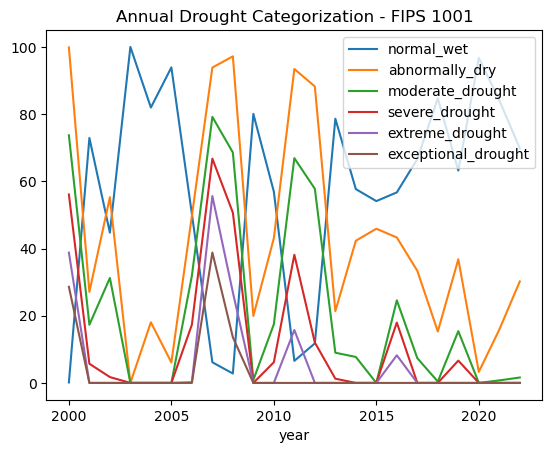

In [85]:
fips1001 = annual_drought[annual_drought['FIPS']=='1001']
fips1001.plot(x='year', y = ['normal_wet','abnormally_dry','moderate_drought','severe_drought','extreme_drought','exceptional_drought'])
plt.title('Annual Drought Categorization - FIPS 1001');

In [86]:
pd.pivot_table(annual_drought,index='year', values = 'FIPS', aggfunc = 'count')

,FIPS
year,
2000,3221
2001,3221
2002,3221
2003,3221
2004,3221
2005,3221
2006,3221
2007,3221
2008,3221


In [118]:
annual_drought.to_csv('raw-data/annual_drought_2000_2020.FIPS.csv', index = False)

In [42]:
annual_drought.columns

Index(['year', 'FIPS', 'normal_wet', 'abnormally_dry', 'moderate_drought',
       'severe_drought', 'extreme_drought', 'exceptional_drought'],
      dtype='object')

### Monthly Drought Dataset

In [89]:
drought.dtypes

MapDate      int64
FIPS        object
None       float64
D0         float64
D1         float64
D2         float64
D3         float64
D4         float64
dtype: object

In [90]:
drought['MapDate'] = pd.to_datetime(drought['MapDate'].astype(str)).dt.strftime('%Y-%m')

In [92]:
mon_drought = round(drought.groupby(by = [drought['MapDate'], 'FIPS']).mean(),2)

In [93]:
mon_drought.head()

None     D0    D1   D2   D3   D4
MapDate FIPS                                    
2000-01 10001  100.0    0.0   0.0  0.0  0.0  0.0
        10003  100.0    0.0   0.0  0.0  0.0  0.0
        10005  100.0    0.0   0.0  0.0  0.0  0.0
        1001     0.0  100.0  75.0  0.0  0.0  0.0
        1003     0.0  100.0   0.0  0.0  0.0  0.0

In [94]:
mon_drought.reset_index(inplace = True)

> Validation

In [106]:
mon_drought[(mon_drought['MapDate'].astype(str)=='2002-03') & (mon_drought['FIPS'] == '1001')]

,MapDate,FIPS,None,D0,D1,D2,D3,D4
83749,2002-03,1001,0.0,100.0,0.0,0.0,0.0,0.0


In [107]:
drought[(drought['MapDate'].astype(str)=='2002-03') & (drought['FIPS'] == '1001')]

,MapDate,FIPS,None,D0,D1,D2,D3,D4
37083,2002-03,1001,0.0,100.0,0.0,0.0,0.0,0.0
37084,2002-03,1001,0.0,100.0,0.0,0.0,0.0,0.0
37085,2002-03,1001,0.0,100.0,0.0,0.0,0.0,0.0
37086,2002-03,1001,0.0,100.0,0.0,0.0,0.0,0.0


In [108]:
mon_drought.rename(columns = {'MapDate':'Month',
                                'None':'normal_wet',
                                'D0':'abnormally_dry',
                                'D1':'moderate_drought',
                                'D2':'severe_drought',
                                'D3':'extreme_drought',
                                'D4':'exceptional_drought'}, inplace = True)

In [109]:
mon_drought.head()

,Month,FIPS,normal_wet,abnormally_dry,moderate_drought,severe_drought,extreme_drought,exceptional_drought
0,2000-01,10001,100.0,0.0,0.0,0.0,0.0,0.0
1,2000-01,10003,100.0,0.0,0.0,0.0,0.0,0.0
2,2000-01,10005,100.0,0.0,0.0,0.0,0.0,0.0
3,2000-01,1001,0.0,100.0,75.0,0.0,0.0,0.0
4,2000-01,1003,0.0,100.0,0.0,0.0,0.0,0.0


In [111]:
mon_drought['Month'].value_counts()

2000-01    3221
2015-03    3221
2015-09    3221
2015-08    3221
2015-07    3221
           ... 
2008-02    3221
2008-03    3221
2008-04    3221
2008-05    3221
2022-12    3221
Name: Month, Length: 276, dtype: int64

In [117]:
mon_drought.to_csv('raw-data/monthly_drought_2000_2020.FIPS.csv', index = False)

In [115]:
mon_drought.columns

Index(['Month', 'FIPS', 'normal_wet', 'abnormally_dry', 'moderate_drought',
       'severe_drought', 'extreme_drought', 'exceptional_drought'],
      dtype='object')

## Combined Files (Annual, Monthly)

In [2]:
# os.getcwd()

'C:\\Users\\farah\\Documents\\General Assembly DSI\\DSI-508\\Projects\\project-5\\project-5data'

In [3]:
os.chdir('../group-project/raw-data')

In [140]:
temp_a = pd.read_csv('raw-data/annual_temperature_2000-2020_FIPS.csv')
temp_m = pd.read_csv('raw-data/monthly_temperature_2000-2020_FIPS.csv')
drought_a = pd.read_csv('raw-data/annual_drought_2000_2020.FIPS.csv')
drought_m = pd.read_csv('raw-data/monthly_drought_2000_2020.FIPS.csv')

#### Annual Combined File

In [122]:
temp_a.head()

,Year,StCoFIPS,Tmean_C,TDmean_C,NETmean_C,HImean_C,HXmean_C,WBGTmean_C,Flag_T,Flag_TD,Flag_NET,Flag_HI,Flag_HX,Flag_WBGT
0,2000,1001,18.45,11.49,12.37,18.48,21.36,16.73,0.0,0.0,0.0,0.0,0.0,0.0
1,2000,1003,20.07,14.69,13.78,20.70,24.86,18.90,0.0,0.0,0.0,0.0,0.0,0.0
2,2000,1005,18.63,12.14,12.92,18.72,21.87,17.17,0.0,0.0,0.0,0.0,0.0,0.0
3,2000,1007,18.01,11.13,12.26,18.04,20.81,16.42,0.0,0.0,0.0,0.0,0.0,0.0
4,2000,1009,16.65,10.19,10.74,16.57,19.02,15.25,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
drought_a.head()

,year,FIPS,normal_wet,abnormally_dry,moderate_drought,severe_drought,extreme_drought,exceptional_drought
0,2000,10001,98.08,1.92,0.00,0.00,0.00,0.00
1,2000,10003,98.08,1.92,0.00,0.00,0.00,0.00
2,2000,10005,97.42,2.59,0.00,0.00,0.00,0.00
3,2000,1001,0.14,99.86,73.70,56.07,38.79,28.61
4,2000,1003,0.00,100.00,80.69,65.77,47.65,20.86


In [124]:
temp_a.rename(columns={'Year': 'year', 'StCoFIPS': 'FIPS'}, inplace=True)

In [125]:
temp_a.FIPS.value_counts()

1001     21
39159    21
39115    21
39117    21
39119    21
         ..
21159    21
21161    21
21163    21
21165    21
56045    21
Name: FIPS, Length: 3108, dtype: int64

In [126]:
drought_a.FIPS.value_counts()

10001    23
45081    23
45061    23
45063    23
45065    23
         ..
26129    23
26131    23
26133    23
26135    23
9015     23
Name: FIPS, Length: 3221, dtype: int64

In [127]:
temp2 = temp_a.merge(drought_a, how='left', on=['year', 'FIPS'])

In [128]:
temp2.head()

,year,FIPS,Tmean_C,TDmean_C,NETmean_C,HImean_C,HXmean_C,WBGTmean_C,Flag_T,Flag_TD,Flag_NET,Flag_HI,Flag_HX,Flag_WBGT,normal_wet,abnormally_dry,moderate_drought,severe_drought,extreme_drought,exceptional_drought
0,2000,1001,18.45,11.49,12.37,18.48,21.36,16.73,0.0,0.0,0.0,0.0,0.0,0.0,0.14,99.86,73.70,56.07,38.79,28.61
1,2000,1003,20.07,14.69,13.78,20.70,24.86,18.90,0.0,0.0,0.0,0.0,0.0,0.0,0.00,100.00,80.69,65.77,47.65,20.86
2,2000,1005,18.63,12.14,12.92,18.72,21.87,17.17,0.0,0.0,0.0,0.0,0.0,0.0,0.00,100.00,95.99,73.52,43.53,18.99
3,2000,1007,18.01,11.13,12.26,18.04,20.81,16.42,0.0,0.0,0.0,0.0,0.0,0.0,7.28,92.72,70.78,48.97,35.25,28.87
4,2000,1009,16.65,10.19,10.74,16.57,19.02,15.25,0.0,0.0,0.0,0.0,0.0,0.0,6.38,93.62,81.44,54.57,30.77,13.16


In [129]:
print(temp_a.shape)
print(drought_a.shape)
print(temp2.shape) # should be number of columns in temp + (number of columns in drought minus 2)

(65268, 14)
(74083, 8)
(65268, 20)


In [13]:
# Note, there will be missings becaause there is more drought into than temp

In [132]:
temp2.isnull().sum()

year                    0
FIPS                    0
Tmean_C                42
TDmean_C               42
NETmean_C              42
HImean_C               42
HXmean_C               42
WBGTmean_C             42
Flag_T                  0
Flag_TD                 0
Flag_NET                0
Flag_HI                 0
Flag_HX                 0
Flag_WBGT               0
normal_wet              0
abnormally_dry          0
moderate_drought        0
severe_drought          0
extreme_drought         0
exceptional_drought     0
dtype: int64

In [131]:
temp2.to_csv('clean-data/Temp_Drought_Combo.csv')

#### Monthly Combined File

In [141]:
temp_m.head()

,Month,StCoFIPS,Tmin_C,Tmax_C,Tmean_C,Flag_T
0,2000-01,1001,4.38,13.26,8.61,0.0
1,2000-01,1003,8.68,15.99,12.20,0.0
2,2000-01,1005,5.00,13.82,9.18,0.0
3,2000-01,1007,3.99,12.64,7.98,0.0
4,2000-01,1009,2.18,10.12,5.92,0.0


In [142]:
drought_m.head()

,Month,FIPS,normal_wet,abnormally_dry,moderate_drought,severe_drought,extreme_drought,exceptional_drought
0,2000-01,10001,100.0,0.0,0.0,0.0,0.0,0.0
1,2000-01,10003,100.0,0.0,0.0,0.0,0.0,0.0
2,2000-01,10005,100.0,0.0,0.0,0.0,0.0,0.0
3,2000-01,1001,0.0,100.0,75.0,0.0,0.0,0.0
4,2000-01,1003,0.0,100.0,0.0,0.0,0.0,0.0


In [143]:
temp_m.rename(columns = {'StCoFIPS' : 'FIPS'}, inplace = True)

In [136]:
temp_m.FIPS.value_counts()

10001    276
45081    276
45061    276
45063    276
45065    276
        ... 
26129    276
26131    276
26133    276
26135    276
9015     276
Name: FIPS, Length: 3221, dtype: int64

In [137]:
drought_m.FIPS.value_counts()

10001    276
45081    276
45061    276
45063    276
45065    276
        ... 
26129    276
26131    276
26133    276
26135    276
9015     276
Name: FIPS, Length: 3221, dtype: int64

In [138]:
temp3 = temp_m.merge(drought_m, how='left', on=['Month', 'FIPS'])

In [139]:
temp3.head()

,Month,FIPS,normal_wet_x,abnormally_dry_x,moderate_drought_x,severe_drought_x,extreme_drought_x,exceptional_drought_x,normal_wet_y,abnormally_dry_y,moderate_drought_y,severe_drought_y,extreme_drought_y,exceptional_drought_y
0,2000-01,10001,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
1,2000-01,10003,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
2,2000-01,10005,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
3,2000-01,1001,0.0,100.0,75.0,0.0,0.0,0.0,0.0,100.0,75.0,0.0,0.0,0.0
4,2000-01,1003,0.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0


In [129]:
print(temp_a.shape)
print(drought_a.shape)
print(temp2.shape) # should be number of columns in temp + (number of columns in drought minus 2)

(65268, 14)
(74083, 8)
(65268, 20)


In [13]:
# Note, there will be missings becaause there is more drought into than temp

In [132]:
temp2.isnull().sum()

year                    0
FIPS                    0
Tmean_C                42
TDmean_C               42
NETmean_C              42
HImean_C               42
HXmean_C               42
WBGTmean_C             42
Flag_T                  0
Flag_TD                 0
Flag_NET                0
Flag_HI                 0
Flag_HX                 0
Flag_WBGT               0
normal_wet              0
abnormally_dry          0
moderate_drought        0
severe_drought          0
extreme_drought         0
exceptional_drought     0
dtype: int64

In [131]:
temp2.to_csv('clean-data/Temp_Drought_Combo.csv')